# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [71]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [72]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

This pie chart presents survey results divided into proportions. There are at least two advantages to this graph. First, the 40% and 25% slices stand out, making it easy to identify the main trend. Second, the chart and its legend are clear.

On the other hand, the pie chart looks cluttered with five different colors that seem randomly assigned. For example, the 5% portion is in red – why use such a bold color? Is this small portion really that important? Further, the 11%, 19%, and 25% slices blend together because they all use colors from the same category. This is especially confusing because 19% represents "Excited" yet its color is very close to the 11% slice labeled "Bored". These two responses are opposites and should have contrasting colors.

The overall color scheme is misleading. While it clearly emphasizes two main categories ("OK" and "Kind of interested"), it creates the illusion that "OK" is more significant than "Excited" and "Kind of interested". However, the latter two categories together make up 44% of the results, suggesting that participants are actually more engaged than the color choices imply. A more thoughtful assignment of colors would make the data more accurately reflect the responses, especially distinguishing between "OK," "Kind of interested," and "Excited". Labeling the slices directly with their categories would also improve readability by reducing the need to cross-reference the legend.

There are also issues with the legend’s wording and order. "OK" is vague and informal; "Neutral" would be a better alternative since it clearly conveys indifference. Whether "Neutral" should be interpreted as positive or negative is beyond the scope of this discussion. The same applies to "Kind of interested" – "Somewhat interested" would be more explicit. Arranging the legend from "Excited" to "Bored" rather than the other way around, would be more intuitive.

The title lacks essential details. What was this survey about? Was it conducted within a specific time frame or location? Providing additional context, such as the number of participants, would help viewers understand the representativeness of the survey.

Given these issues, a pie chart is not the best choice for precise comparisons. A bar chart would be more effective in distinguishing the different categories and highlighting trends more clearly.

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [73]:
num_customers = 100
np.random.seed(0)

In [74]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [75]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]


In [76]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')


In [77]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [78]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [79]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [80]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"


In [81]:
df_bank.loc[2, "AccountID"] = np.nan

In [82]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [83]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [84]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [85]:
# The first few rows
df_bank_loaded.iloc[0:5]


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


In [86]:
df_bank_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     99 non-null     float64
 1   BirthDate      99 non-null     object 
 2   SSN            99 non-null     object 
 3   AccountID      98 non-null     float64
 4   AccountOpened  99 non-null     object 
 5   AccountType    99 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [87]:
df_bank_loaded.describe(percentiles = [1/3, 2/3])

,CustomerID,AccountID
count,99.000000,98.000000
mean,49.000000,46.551020
std,28.722813,27.679358
min,0.000000,0.000000
33.3%,32.666667,32.000000
50%,49.000000,42.000000
66.7%,65.333333,61.000000
max,98.000000,97.000000


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [88]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [89]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [90]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [91]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [92]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [93]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [94]:
df_bank_datefix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 2 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     97 non-null     float64       
 1   BirthDate      97 non-null     datetime64[ns]
 2   SSN            97 non-null     object        
 3   AccountID      96 non-null     float64       
 4   AccountOpened  97 non-null     datetime64[ns]
 5   AccountType    97 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 5.3+ KB


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [95]:
# Check for null values in all columns
df_bank_datefix.isna().any()

CustomerID       False
BirthDate        False
SSN              False
AccountID         True
AccountOpened    False
AccountType      False
dtype: bool

In [96]:
# Google search: "how do I remove rows with null values in a pandas DataFrame?" - https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_bank_null_removed = df_bank_datefix.dropna()

# Check if there are any null values left
df_bank_null_removed[df_bank_null_removed.isna().any(axis=1)]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType


In [97]:
# Google search: "how do I fill in null values in a pandas DataFrame?" - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
# Although fillna deprecated since version 2.1.0, it is still supported and works for this task
df_bank_filled = df_bank_datefix.fillna(value=9999) 

# Check which row in question was filled - the row 2 has 9999.
df_bank_filled[df_bank_filled == 9999]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,NaN,NaT,NaN,9999.0,NaT,NaN
3,NaN,NaT,NaN,NaN,NaT,NaN
4,NaN,NaT,NaN,NaN,NaT,NaN
5,NaN,NaT,NaN,NaN,NaT,NaN
6,NaN,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...
94,NaN,NaT,NaN,NaN,NaT,NaN
95,NaN,NaT,NaN,NaN,NaT,NaN
96,NaN,NaT,NaN,NaN,NaT,NaN
97,NaN,NaT,NaN,NaN,NaT,NaN


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [98]:
# The answer about finding duplicates was found here: https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/
df_bank_null_removed.duplicated(subset=['AccountID'])

3     False
4     False
5     False
6     False
7     False
      ...  
94    False
95    False
96    False
97     True
98     True
Length: 96, dtype: bool

In [99]:
df_bank_null_removed

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


In [117]:
# Check the number of duplicates, excluding the original values
duplicates = df_bank_null_removed[df_bank_null_removed.duplicated(subset=['AccountID'], keep='first')]
duplicates.count()

CustomerID       33
BirthDate        33
SSN              33
AccountID        33
AccountOpened    33
AccountType      33
dtype: int64

In [120]:
# The answer about removeing duplicates was also found here: https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/ - it keeps the first unique row
# Check if duplicates were removed ("False" means there are no duplicates). The answer was found here: https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column 
df_bank_unique.duplicated(subset=['AccountID']).any()

np.False_

In [119]:
# The number of rows after the duplicates were removed
df_bank_unique.count()

CustomerID       65
BirthDate        65
SSN              65
AccountID        64
AccountOpened    65
AccountType      65
dtype: int64

5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [121]:
# The result below was achieved after combining https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html with data[data.duplicated(keep = False)] from the instructions
# Since the duplicates were in the previous step (now it's df_bank_unique), "False" means the AccountID is unique
df_bank_unique["AccountID"].duplicated(keep=False)


40    False
0     False
66    False
33    False
30    False
      ...  
32    False
18    False
21    False
7     False
62    False
Name: AccountID, Length: 65, dtype: bool

6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [122]:
# The method was found here: https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
unique_account_ids = df_bank_unique["AccountID"].nunique()
print("Unique AccountIDs:", unique_account_ids)


Unique AccountIDs: 64


7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [123]:
df_bank_unique = df_bank_null_removed.drop_duplicates(subset=['AccountID'], keep='first')
print(df_bank_unique)

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings
7          7.0 2016-06-18  593-49-1249       16.0    2087-07-24     savings
..         ...        ...          ...        ...           ...         ...
88        88.0 1962-02-07  327-09-3267       97.0    1989-10-03          cd
90        90.0 1969-06-18  395-31-7064       34.0    2010-12-28    checking
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking
96        96.0 1989-03-09  870-80-0364        0.0    2054-11-01          cd

[63 rows x 6 columns]


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

In [ ]:
today = pd.to_datetime("today")
df_bank_unique = df_bank_unique.copy()
df_bank_unique.loc[:, "Age"] = (today - df_bank_unique["BirthDate"]).dt.days // 365

mean_age = df_bank_unique["Age"].mean()
median_age = df_bank_unique["Age"].median()
mode_age = df_bank_unique["Age"].mode()[0]

print("Mean Customer Age:", mean_age)
print("Median Customer Age:", median_age)
print("Mode Customer Age:", mode_age)

Mean Customer Age: 36.84126984126984
Median Customer Age: 34.0
Mode Customer Age: 28


In [136]:
# Check for outliers

# Was an account opened before DOB?
account_open_before_birth = df_bank_unique[df_bank_unique["AccountOpened"] < df_bank_unique["BirthDate"]]

# Future DOB
today = datetime.today()
future_birth_date = df_bank_unique[df_bank_unique["BirthDate"] > today]

# Future account open date
future_threshold = datetime(2025, 1, 1)
future_account_open = df_bank_unique[df_bank_unique["AccountOpened"] > future_threshold]

# Is a client under 18 or over 115?
unrealistic_age = df_bank_unique[
    ((df_bank_unique["AccountOpened"] - df_bank_unique["BirthDate"]).dt.days / 365 < 18) |
    ((df_bank_unique["AccountOpened"] - df_bank_unique["BirthDate"]).dt.days / 365 > 120)
]

# Does SSN have 9 digits? 
df_bank_unique["SSN_digits"] = df_bank_unique["SSN"].str.replace("-", "", regex=True)
invalid_ssn_length = df_bank_unique[df_bank_unique["SSN_digits"].str.len() != 9]

In [126]:
# No outliers
account_open_before_birth

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age


In [127]:
# No outliers
future_birth_date

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age


In [128]:
# 36 outliers were opened in the future, indicating inaccuracy in the data
future_account_open.count()

CustomerID       36
BirthDate        36
SSN              36
AccountID        36
AccountOpened    36
AccountType      36
Age              36
dtype: int64

In [ ]:
# It shows all accounts (36) opened after 1/1/2025. This is an arbitrary date and can be adjusted depending on a task.
# The accounts were opened far in the future: in 2036, 2048, 2070, etc. 
future_account_open

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,16
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8
8,8.0,2006-10-31,121-74-2917,24.0,2046-11-17,savings,18
9,9.0,2010-12-10,844-31-4793,29.0,2048-06-01,checking,14
11,11.0,1990-11-22,509-92-0704,25.0,2036-03-17,savings,34
15,15.0,2004-05-09,417-04-6784,83.0,2031-01-21,cd,20
16,16.0,1990-02-10,527-61-9953,33.0,2047-01-25,cd,35
17,17.0,1996-10-15,377-72-0498,32.0,2063-08-28,checking,28


In [ ]:
# 12 outliers were either too old or too young to open an account, indicating inaccuracy in the data (details below)
unrealistic_age.count()

CustomerID       12
BirthDate        12
SSN              12
AccountID        12
AccountOpened    12
AccountType      12
Age              12
dtype: int64

In [ ]:
# There is a mismatch between the DOB and Age columns. For example, row 3 lists 2003-10-18 as DOB, but the person opened account in 2004, which is not possible.
unrealistic_age

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,16
10,10.0,1988-08-25,857-15-1139,21.0,1998-01-04,checking,36
12,12.0,1992-03-31,698-04-7583,80.0,2008-09-07,checking,32
13,13.0,1993-05-07,304-91-3605,60.0,2001-02-26,checking,31
20,20.0,2000-12-10,953-24-6512,31.0,2009-08-31,savings,24
33,33.0,1955-02-15,986-06-7499,93.0,1967-11-11,cd,70
40,40.0,1952-03-08,291-98-5506,82.0,1953-05-05,cd,72
46,46.0,1994-09-08,826-66-1458,69.0,1997-05-02,savings,30
47,47.0,2003-12-30,279-98-4046,87.0,2015-12-17,cd,21


In [129]:
# While the dataset does not contain unrealistically high ages, some of the customers are unusually young to open an account, as shown above
# Generally, a person in the US must be 18 years old to open a bank account
# Opening a checking account is possible for kids ages 13–17 that's a joint account with an adult

df_bank_unique["Age"].describe()

count    63.000000
mean     36.841270
std      19.865846
min       1.000000
25%      22.500000
50%      34.000000
75%      54.500000
max      73.000000
Name: Age, dtype: float64

In [ ]:
# No outliers
invalid_ssn_length

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,SSN_digits


9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [ ]:
one_hot = pd.get_dummies(df_bank_unique["AccountType"])
df2 = df_bank_unique.join(one_hot)
df2.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,SSN_digits,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,474057613,True,False,False
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,750555509,True,False,False
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,671430485,False,True,False
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,288629296,False,False,True
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,593491249,False,False,True


Now, change the cd, checking, and savings columns into integers.

In [138]:
df_bank_encoded = df2
df_bank_encoded[["cd", "checking", "savings"]] = df_bank_encoded[["cd", "checking", "savings"]].astype(int)
df_bank_encoded


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,SSN_digits,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,474057613,1,0,0
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,750555509,1,0,0
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,671430485,0,1,0
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,288629296,0,0,1
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,8,593491249,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
88,88.0,1962-02-07,327-09-3267,97.0,1989-10-03,cd,63,327093267,1,0,0
90,90.0,1969-06-18,395-31-7064,34.0,2010-12-28,checking,55,395317064,0,1,0
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings,55,958128308,0,0,1
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking,49,607971651,0,1,0


10. Are there any other data values that do not seem right?  If not, give an example?

##### **To summarize the tests for outliers, some columns contain inconsistencies:**
1. **36 accounts** were opened after 1/1/2025. This date is arbitrary and can be adjusted based on the task. The key issue is that these accounts were opened far in the future, including years like 2036, 2048, and even 2070.

2. **12 accounts** had discrepancies between the DOB and Age columns. While the dataset does not contain unrealistically high ages, some customers appear too young to open an account. In the U.S., a person generally must be 18 years old to open a bank account, although minors (13–17) can open a joint account with an adult. For example, row 3 lists a DOB of 2003-10-18, but the account was opened in 2004, which is not possible.




I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

Text(0.5, 0, 'Birth Date')

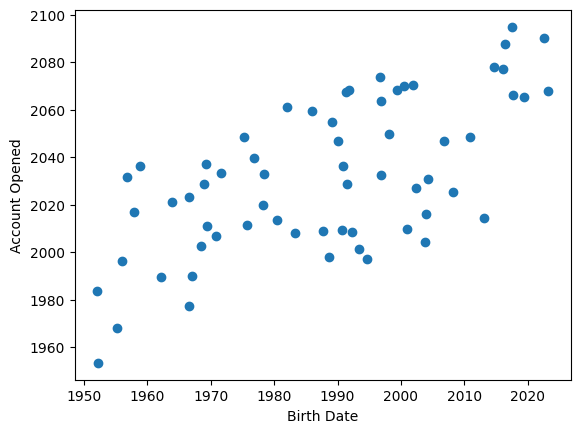

In [ ]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df_bank_unique["BirthDate"], df_bank_unique["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis

#### **Analysis and Visualization for Task 11**
This dataset is hardly suitable for drawing meaningful conclusions due to its large number of discrepancies. After addressing duplicates and missing values, the dataset shrank from 99 to 53 rows. It became even smaller (down to just 17 rows) after excluding unrealistically young customers and accounts opened far in the future, as they were not accurate. Ideally, a larger dataset would be needed for more reliable analysis. However, some cautious conclusions can still be drawn from these 17 cleaned rows:

1. Older generations (born before 1970) tend to open accounts later in life.
2. Younger generations (born after 1970) open accounts earlier, closer to adulthood.
3. There’s a peak in account openings between 2010 and 2025, confirming the pattern that more recent generations open accounts sooner.

None of this is surprising, given the accelerated adoption of technology by younger generations and the increasing availability of financial services. This aligns with a broader trend in 21st-century banking. For example:

"81% of adults were fully banked in 2021, compared with 71% in 2015." (https://usafacts.org/articles/who-is-the-least-likely-to-have-a-bank-account-in-the-us/)
"In 2013, 7.7% of U.S. households were unbanked. By 2023, this figure decreased to 4.2%, the lowest level since the FDIC began its surveys in 2009." (https://www.stlouisfed.org/open-vault/2024/dec/picture-banking-access-financial-inclusion-us)



In [ ]:
df_bank.count()

CustomerID       99
BirthDate        99
SSN              99
AccountID        98
AccountOpened    99
AccountType      99
dtype: int64

In [ ]:
df_bank_unique.count()

CustomerID       53
BirthDate        53
SSN              53
AccountID        53
AccountOpened    53
AccountType      53
Age              53
SSN_digits       53
BirthYear        53
OpenedYear       53
AgeAtOpening     53
AgeAtOpen        53
BirthDecade      53
dtype: int64

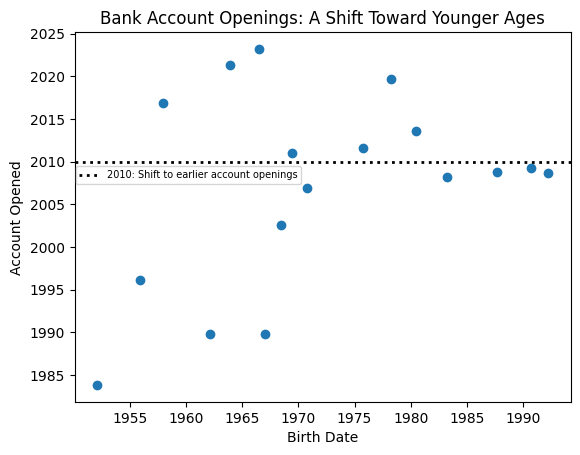

In [ ]:
# The original scatter plot used as an example above included accounts opened far in the future, which is not correct and should be addressed first.

# Cutoff date for unrealistic account opening dates
cutoff_date = pd.Timestamp("2025-01-01")

# Remove rows where AccountOpened is beyond the cutoff
df_bank_unique_cutoff = df_bank_unique[df_bank_unique["AccountOpened"] <= cutoff_date]

df_bank_unique_cutoff_dob = df_bank_unique_cutoff[df_bank_unique_cutoff["AgeAtOpen"] >= 13]

ax = plt.gca() 
ax.scatter(df_bank_unique_cutoff_dob ["BirthDate"], df_bank_unique_cutoff_dob["AccountOpened"]) 
plt.title("Bank Account Openings: A Shift Toward Younger Ages")
ax.set_ylabel("Account Opened") 
ax.set_xlabel("Birth Date") 

plt.axhline(y=pd.Timestamp("2010-01-01"), color="black", linestyle="dotted", linewidth=2, label="2010: Shift to earlier account openings")

plt.legend(loc="upper left", bbox_to_anchor=(-0.008, 0.65), fontsize=7)

plt.show()


# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

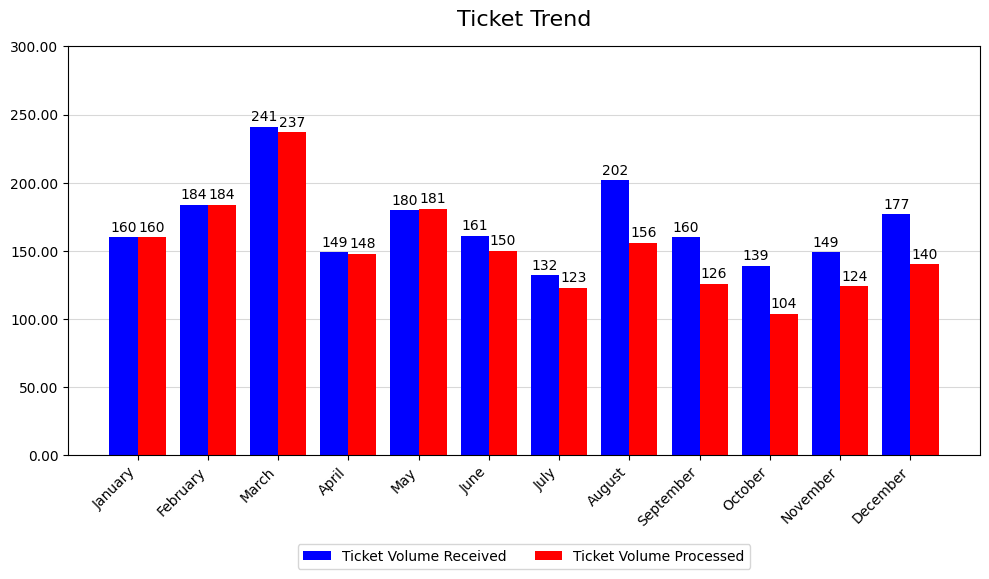

In [ ]:
import matplotlib.ticker as ticker

# Replicate data
months = [
    "January", "February", "March", "April",
    "May",     "June",     "July",  "August",
    "September","October", "November","December"
]
received = np.array([160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177])
processed = np.array([160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

x = np.arange(len(months))
width = 0.4  

bar1 = ax.bar(x - width/2, received,  width, label='Ticket Volume Received', color='blue')
bar2 = ax.bar(x + width/2, processed, width, label='Ticket Volume Processed', color='red')

# Add labels above the bars
for b in bar1:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 2, 
            f'{int(b.get_height())}', ha='center', va='bottom')
for b in bar2:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 2, 
            f'{int(b.get_height())}', ha='center', va='bottom')

# Add axes, grid, and ticks
ax.set_title("Ticket Trend", fontsize=16, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha="right")
ax.set_ylim([0, 300]) 

# Add gray horizontal grid lines behind the bars
ax.set_axisbelow(True)  
ax.yaxis.grid(True, color='gray', linestyle='-', alpha=0.3)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# Set y-ticks at 50
y_ticks = np.arange(0, 301, 50)
ax.set_yticks(y_ticks)

# Place the legend at the bottom
ax.legend(
    loc='upper center',     
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True, shadow=False, ncol=2
)

plt.tight_layout()
plt.show()
